In [1]:
# python
import numpy as np
import matplotlib.pyplot as plt

# pytorch:
import torch as t
import torchvision.transforms as ttf
from torch.optim import Adam
from torch.nn import (
    Sequential,
    Conv2d,
    BatchNorm2d,
    ReLU,
    MaxPool2d,
    Dropout,
    Flatten,
    Linear,
    Module,
    CrossEntropyLoss
)

# Custom lib:
import a4_lib

# debug:
from icecream import ic


In [2]:
# INIT: ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- #
### Directory generation ###
OUT_DIR_E1 = "output/E1"
a4_lib.create_all_folders(DIR=OUT_DIR_E1)

In [3]:
# USER DEFINE: ----- ----- ----- ----- ----- ----- ----- ----- ----- #
TOTA_NUM_EPOCHS = 5
LEARNING_RATE   = 0.001
IMG_SIZE        = (32, 32)
BATCH_SIZE      = 1
MAX_SAMPLES     = 10 # Default: None => all data
VERBOSE_LEVEL   = a4_lib.VerboseLevel.HIGH
### MODEL ###
MODEL_DICT = {
    "VGG11": 
        Sequential(
            ## CNN Feature Extraction
            Conv2d(  1,  64, 3, 1, 1), BatchNorm2d( 64), ReLU(), MaxPool2d(2,2),
            Conv2d( 64, 128, 3, 1, 1), BatchNorm2d(128), ReLU(), MaxPool2d(2,2),
            Conv2d(128, 256, 3, 1, 1), BatchNorm2d(256), ReLU(),
            Conv2d(256, 256, 3, 1, 1), BatchNorm2d(256), ReLU(), MaxPool2d(2,2),
            Conv2d(256, 512, 3, 1, 1), BatchNorm2d(512), ReLU(),
            Conv2d(512, 512, 3, 1, 1), BatchNorm2d(512), ReLU(), MaxPool2d(2,2),
            Conv2d(512, 512, 3, 1, 1), BatchNorm2d(512), ReLU(),
            Conv2d(512, 512, 3, 1, 1), BatchNorm2d(512), ReLU(), MaxPool2d(2,2),
            # Classifier
            Flatten(1),
            Linear( 512, 4096), ReLU(), Dropout(0.5),
            Linear(4096, 4096), ReLU(), Dropout(0.5),
            Linear(4096,   10),
        ),
}

In [4]:
# Loading dataset:
train_dataset, test_dataset = a4_lib.A4_EX1_CNN_HELPER.load_mnist_data(
    batch_size  = BATCH_SIZE, 
    resize      = IMG_SIZE # NOTE: make sure you understand why
)


=== Loading Data ... 
=== Loading Data [x] ===


In [5]:
# train & evaulate:
report = a4_lib.A4_EX1_CNN_HELPER.train(
    train_dataset = train_dataset, 
    test_dataset  = test_dataset,
    loss_func     = CrossEntropyLoss(),
    net           = MODEL_DICT["VGG11"], 
    optimizer     = Adam(MODEL_DICT["VGG11"].parameters(), lr=LEARNING_RATE), 
    num_epochs    = TOTA_NUM_EPOCHS,
    verbose_level = VERBOSE_LEVEL,
    max_data_samples = MAX_SAMPLES,
)

# output state:
t.save(MODEL_DICT["VGG11"].state_dict(), "%s/last.pth"%(OUT_DIR_E1))

> epoch 1/5:
  >> Learning (wip)
  >> Testing (wip)
    epoch 1 > Training: [LOSS: 6.8988 | ACC: 0.0000] | Testing: [LOSS: 4.6929 | ACC: 0.3000] Ellapsed: -4.10+-0.96 s | rate:0.00100
> epoch 2/5:
  >> Learning (wip)
  >> Testing (wip)
    epoch 2 > Training: [LOSS: 4.0305 | ACC: 0.1000] | Testing: [LOSS: 4.5387 | ACC: 0.2000] Ellapsed: -3.81+-1.09 s | rate:0.00100
> epoch 3/5:
  >> Learning (wip)
  >> Testing (wip)
    epoch 3 > Training: [LOSS: 3.3183 | ACC: 0.0000] | Testing: [LOSS: 4.1512 | ACC: 0.2000] Ellapsed: -4.18+-0.99 s | rate:0.00100
> epoch 4/5:
  >> Learning (wip)
  >> Testing (wip)
    epoch 4 > Training: [LOSS: 3.6398 | ACC: 0.0000] | Testing: [LOSS: 2.7233 | ACC: 0.1000] Ellapsed: -4.02+-0.99 s | rate:0.00100
> epoch 5/5:
  >> Learning (wip)
  >> Testing (wip)
    epoch 5 > Training: [LOSS: 2.8009 | ACC: 0.1000] | Testing: [LOSS: 2.4190 | ACC: 0.0000] Ellapsed: -4.09+-0.99 s | rate:0.00100


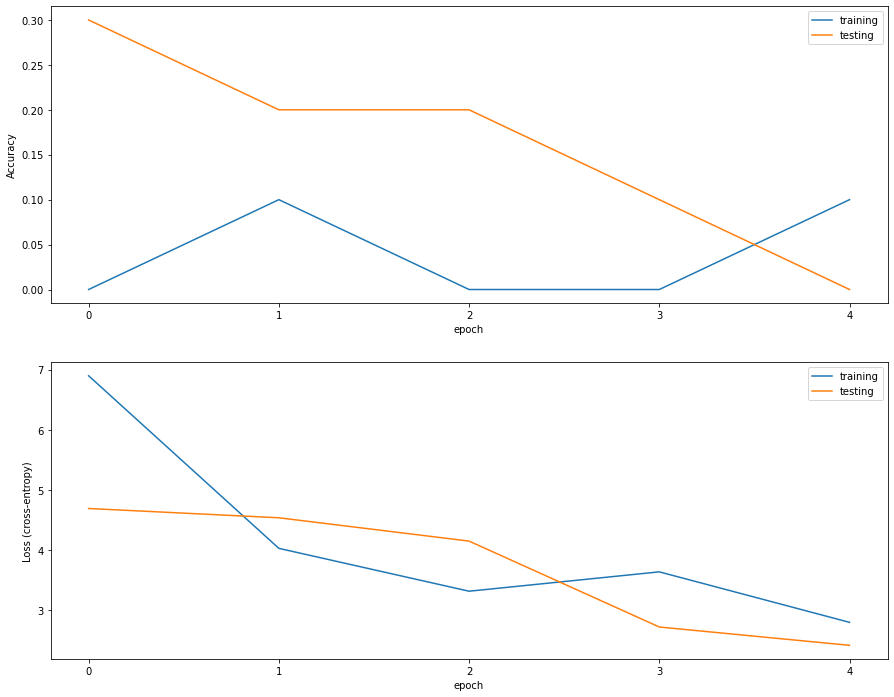

In [6]:
report.output_progress_plot(
    OUT_DIR = OUT_DIR_E1,
    tag = "VGG11"
)